##Most Imports

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.metrics import R2Score
from keras.layers import LSTM, Dense, Embedding
from keras.models import Sequential
from keras.preprocessing import sequence
import keras.backend as K
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
from statistics import stdev
import pandas_datareader as dr
from datetime import date
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# to download charts in latex friendly format
# !sudo apt install texlive-latex-extra

##Process Data

In [ ]:
max_words = 20000
maxlen = 80

print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
print(len(x_train), "train sequences")
print(len(x_test), "test sequences")

print("Pad sequences (samples x time)")
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)



Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


## Create Model

In [ ]:
def model_sentiment():
  model = Sequential()
  model.add(Embedding(max_words, 128))
  model.add(LSTM(128))
  model.add(Dense(32, activation="gelu"))
  model.add(Dense(1, activation="sigmoid"))
  return model

## Initialize Batch sizes and Optimizaton algorithms

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam
from keras.metrics import Accuracy, Precision, F1Score

batch_sizes = [x_train.shape[0], 1024, 512, 128]

# load optimization algorithms
def fetch_algs():
  plain = SGD(learning_rate = 0.001, momentum = 0.0, name = 'Plain')
  momentum = SGD(learning_rate = 0.001, momentum=0.9, name = 'Momentum')
  rmsprop = RMSprop(learning_rate = 0.001, name = 'RMSprop')
  adam = Adam(learning_rate = 0.001, name = 'Adam')

  return [plain, momentum, rmsprop, adam]

In [ ]:
from keras.metrics import Precision, Recall
from sklearn.metrics import confusion_matrix

precision = Precision()
recall = Recall()

## Graphing Functions

In [ ]:
import os
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Directory to save the plots
plot_dir = "plots"
os.makedirs(plot_dir, exist_ok=True)

# def save_plot(filename, *args, **kwargs):
#     plt.savefig(filename)
#     plt.close()

def plot_loss(history, filename="loss_plot.png"):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy(history, filename="accuracy_plot.png"):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes, filename="confusion_matrix.png"):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

def plot_roc(y_true, y_score, filename="roc_curve.png"):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


## Train Model

==================== BATCH SIZE = 25000, OPT_ALG = Plain ====================


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2695745 (10.28 MB)
Trainable params: 2695745 (10.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/12
1/1 [==============================] - 8s 8s/step - loss:

<ipython-input-8-5fbdafcfc95b>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


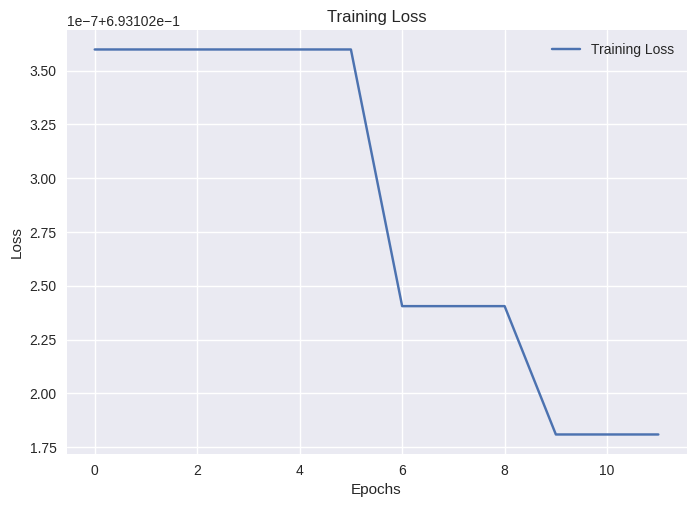

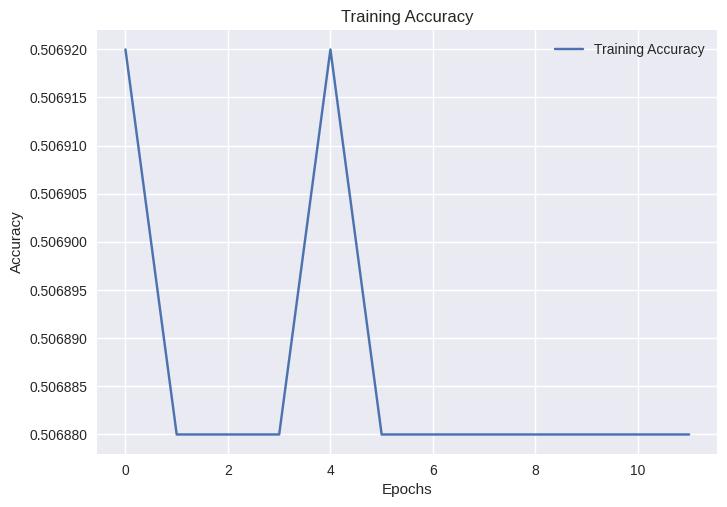

782/782 [==============================] - 3s 4ms/step


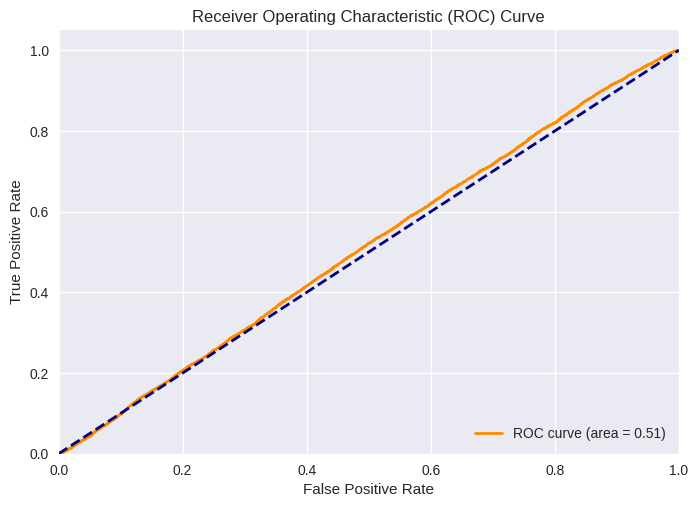

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 25000, OPT_ALG = Momentum ====================


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
    

<ipython-input-8-5fbdafcfc95b>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


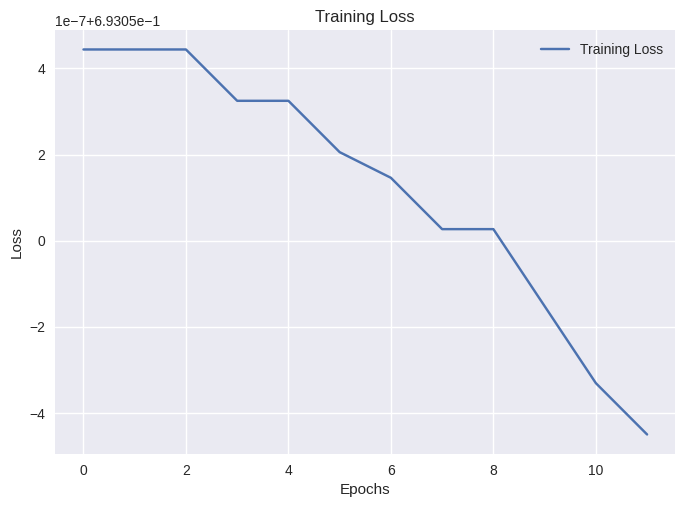

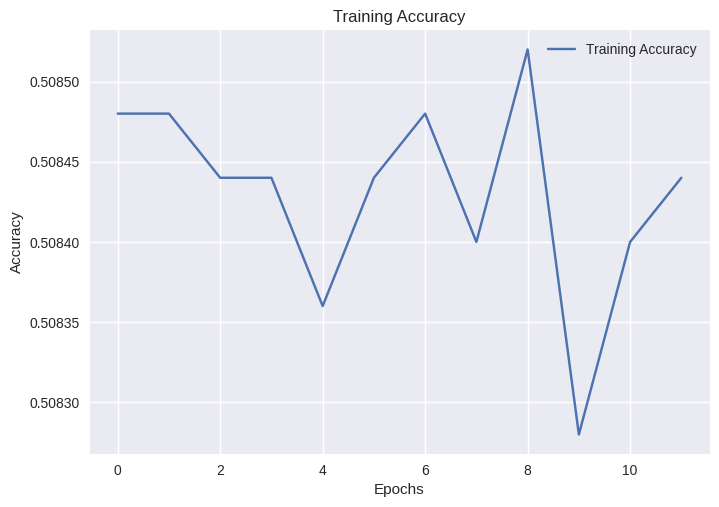

782/782 [==============================] - 3s 3ms/step


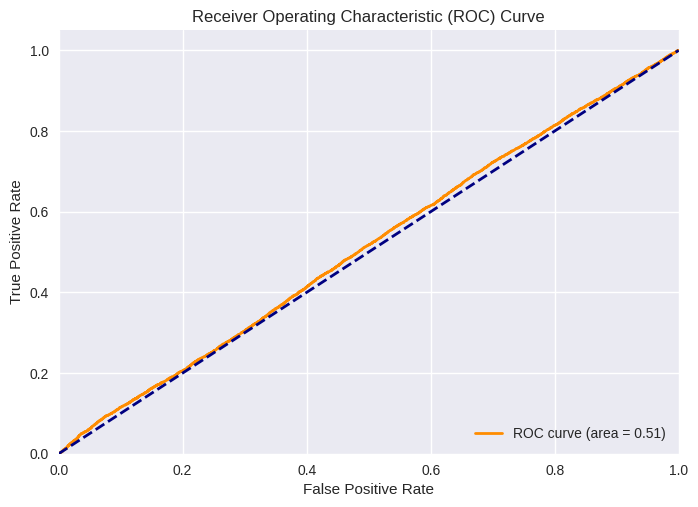

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 25000, OPT_ALG = RMSprop ====================


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
     

<ipython-input-8-5fbdafcfc95b>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


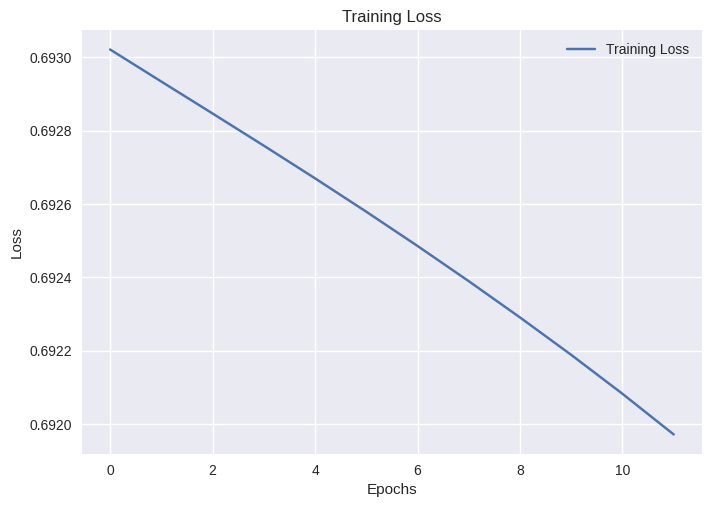

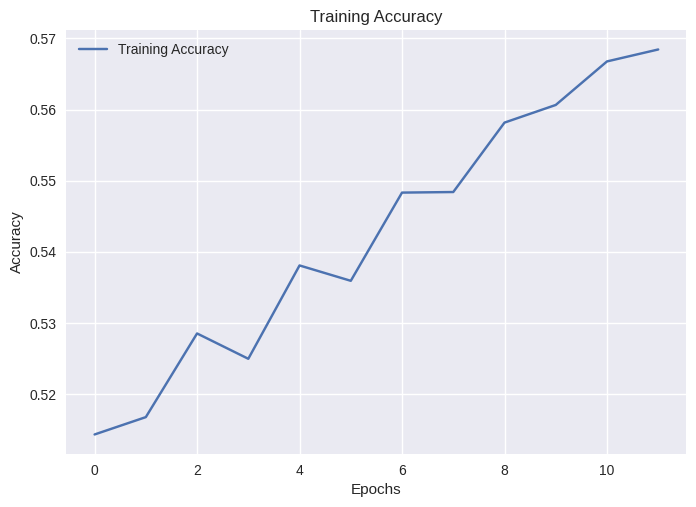

782/782 [==============================] - 3s 3ms/step


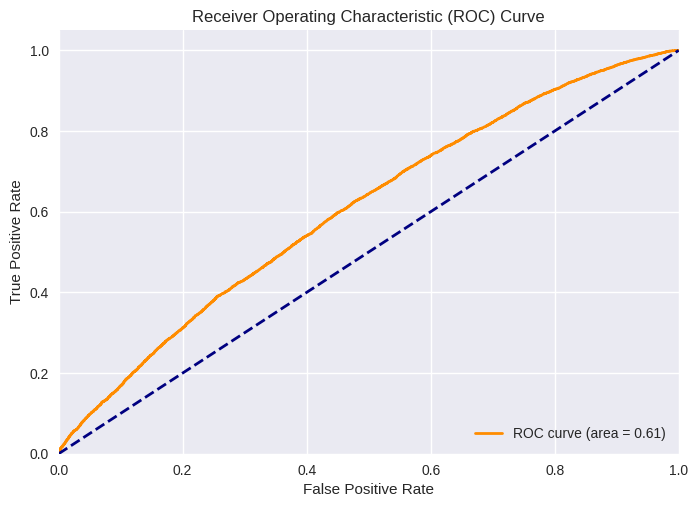

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 25000, OPT_ALG = Adam ====================


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
        

<ipython-input-8-5fbdafcfc95b>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


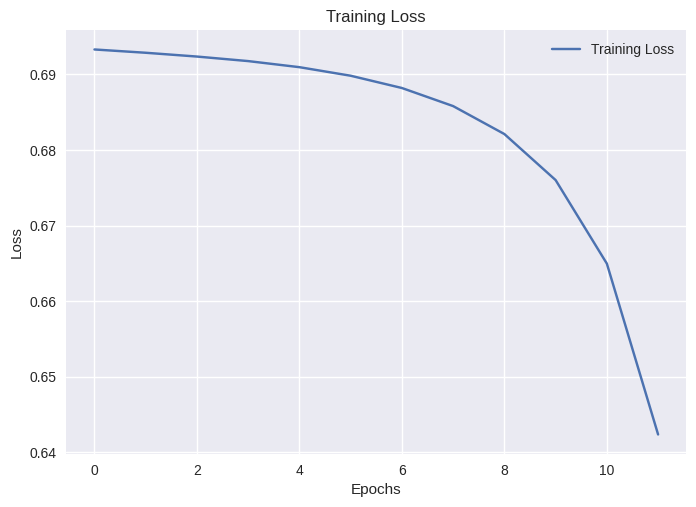

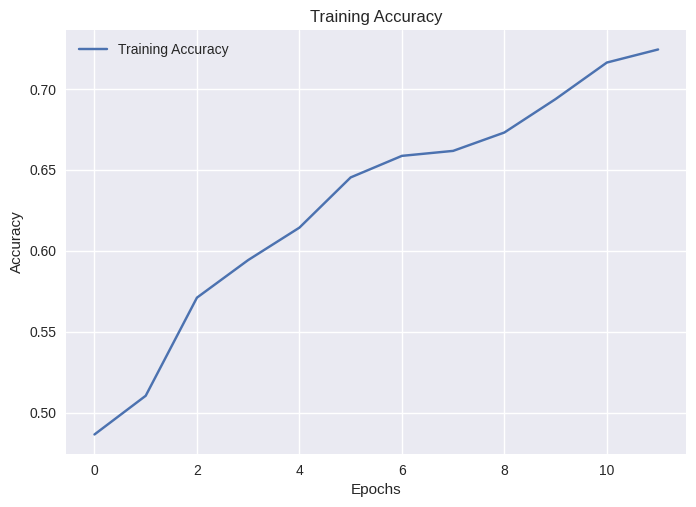

782/782 [==============================] - 3s 4ms/step


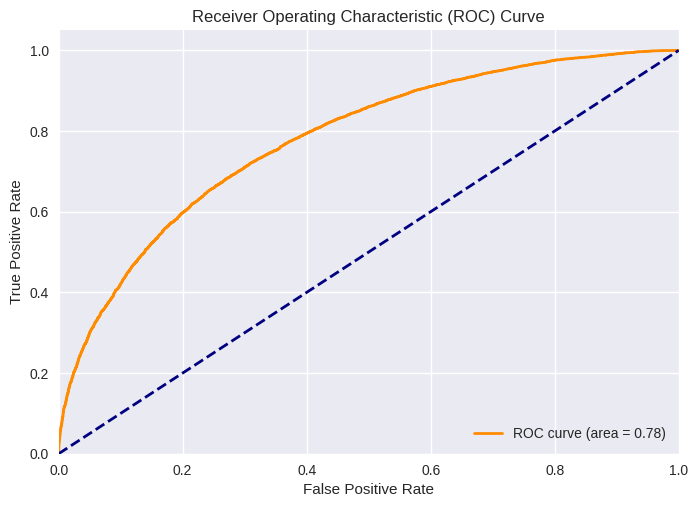

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 1024, OPT_ALG = Plain ====================


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
        

<ipython-input-8-5fbdafcfc95b>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


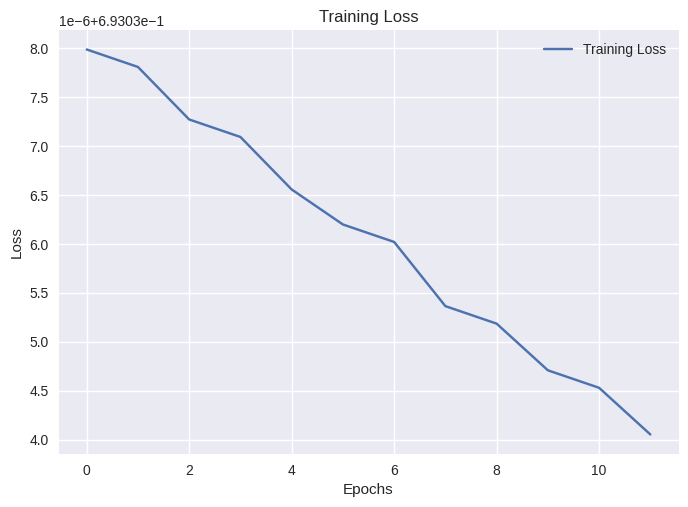

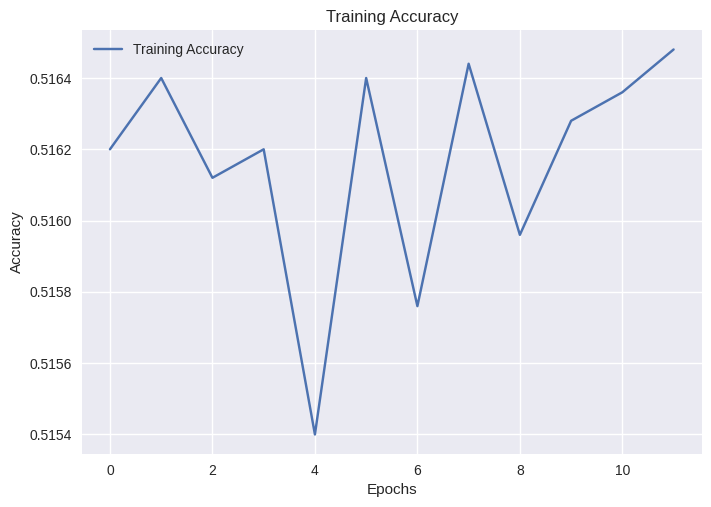

782/782 [==============================] - 3s 3ms/step


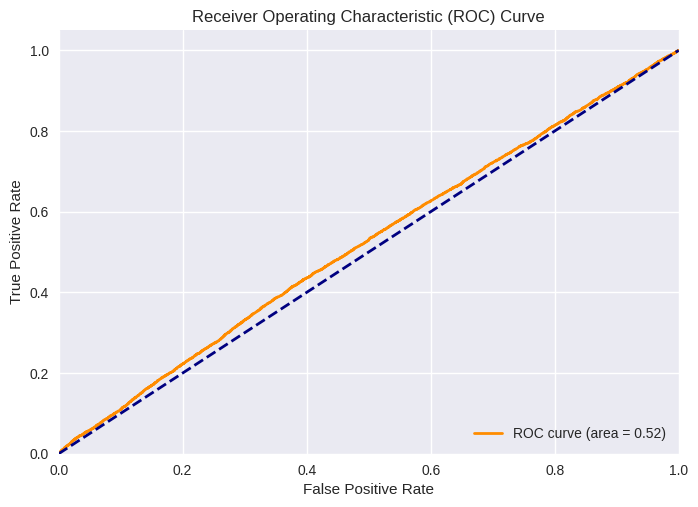

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 1024, OPT_ALG = Momentum ====================


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
     

<ipython-input-8-5fbdafcfc95b>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


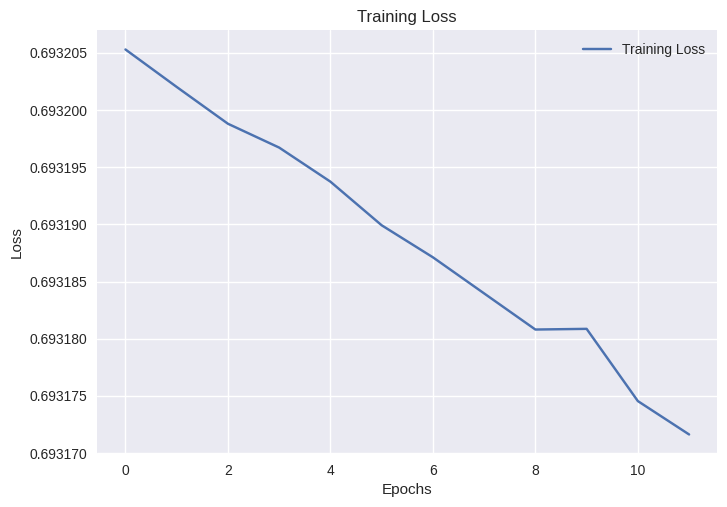

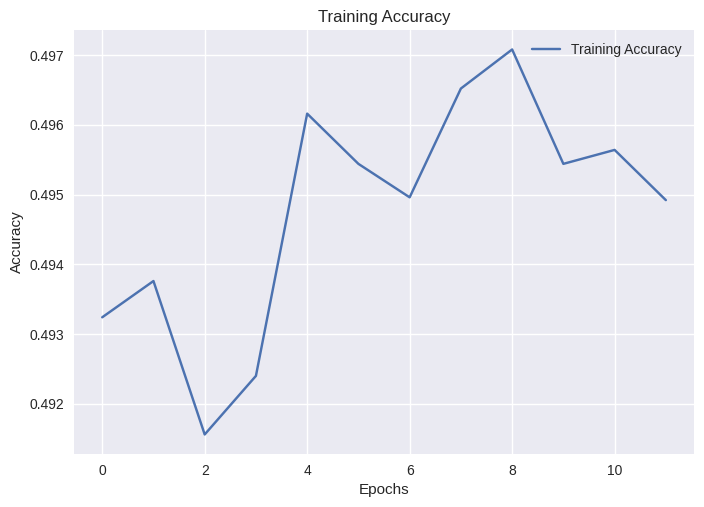

782/782 [==============================] - 3s 3ms/step


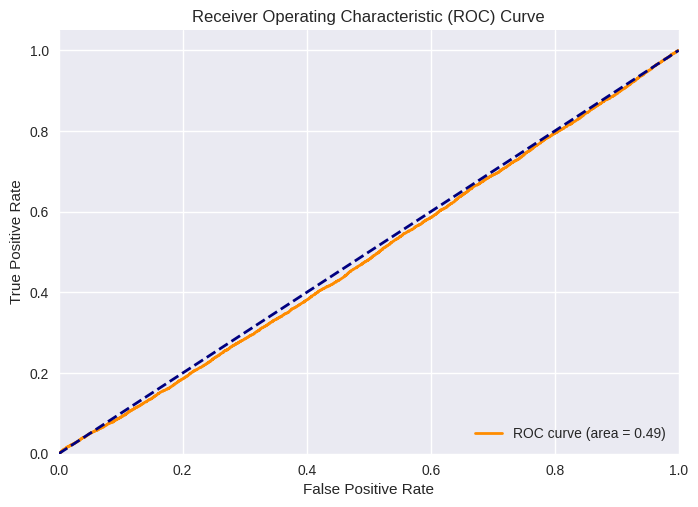

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 1024, OPT_ALG = RMSprop ====================


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_6 (LSTM)               (None, 128)               131584    
                                                                 
 dense_12 (Dense)            (None, 32)                4128      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
      

<ipython-input-8-5fbdafcfc95b>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


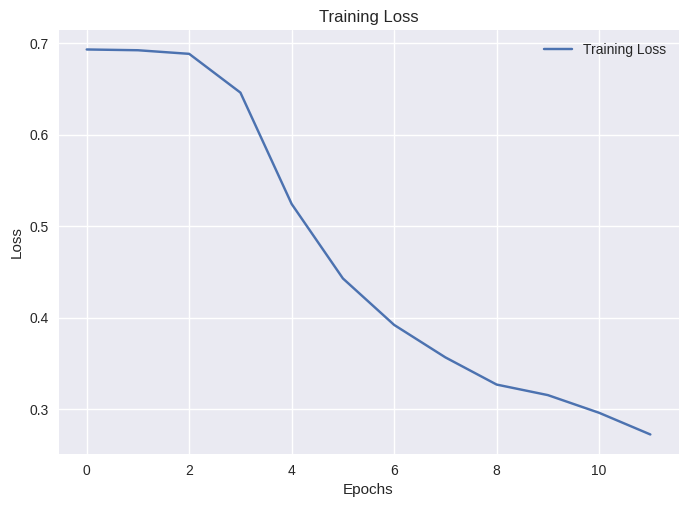

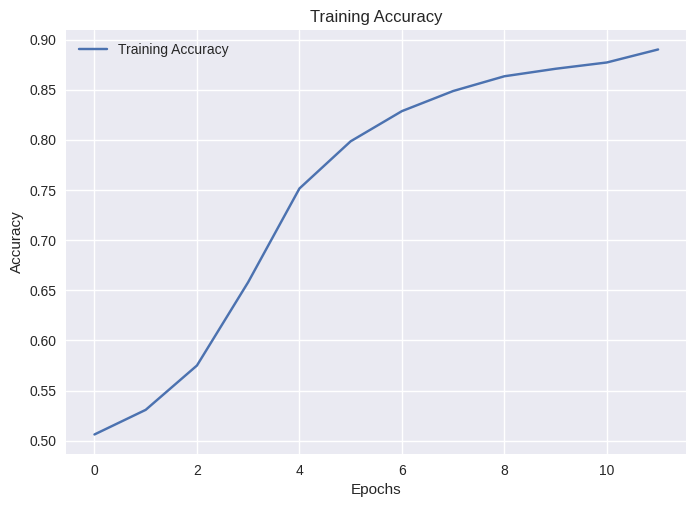

782/782 [==============================] - 3s 3ms/step


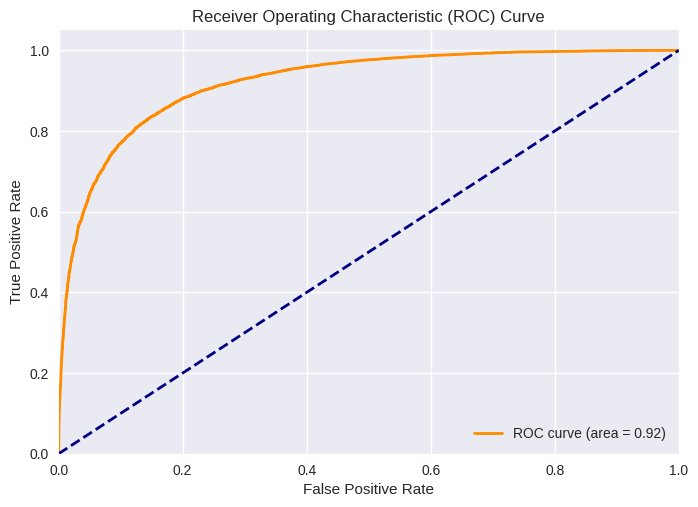

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 1024, OPT_ALG = Adam ====================


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dense_14 (Dense)            (None, 32)                4128      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
         

<ipython-input-8-5fbdafcfc95b>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


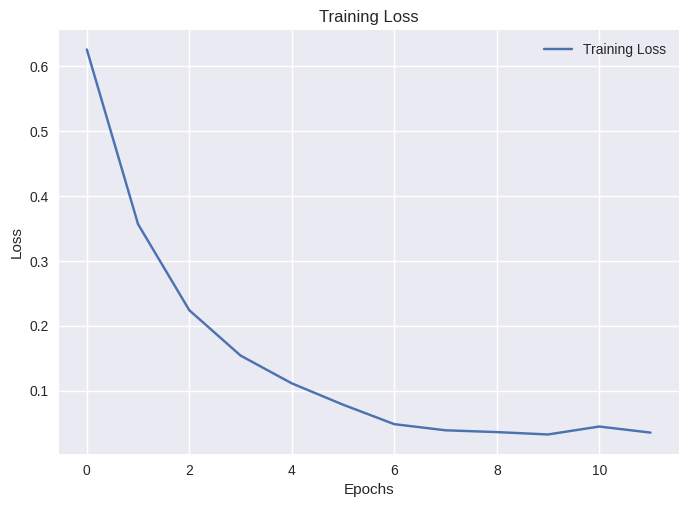

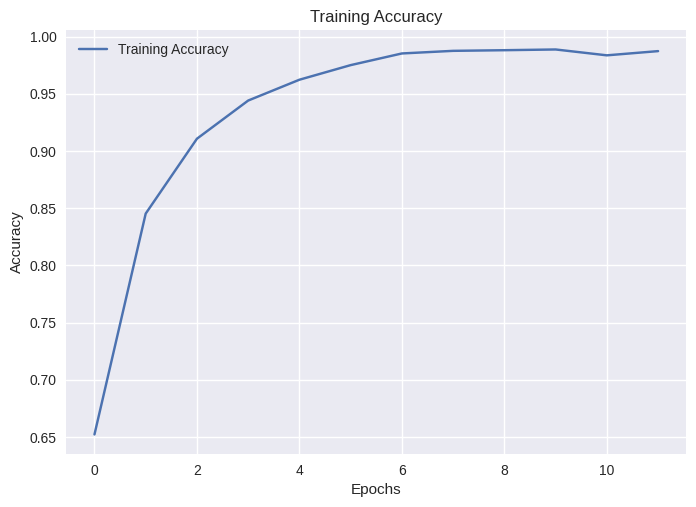

782/782 [==============================] - 3s 3ms/step


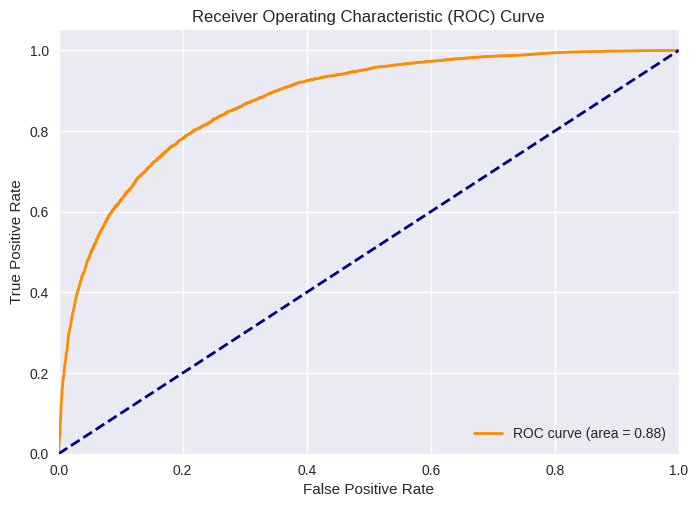

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 512, OPT_ALG = Plain ====================


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_8 (LSTM)               (None, 128)               131584    
                                                                 
 dense_16 (Dense)            (None, 32)                4128      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
         

<ipython-input-8-5fbdafcfc95b>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


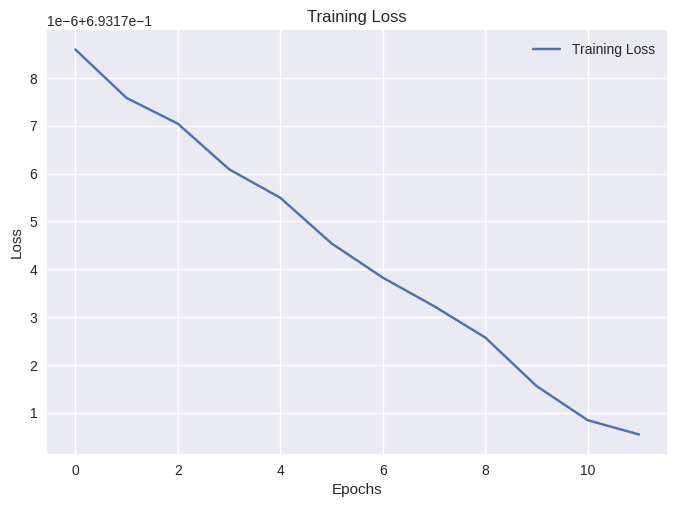

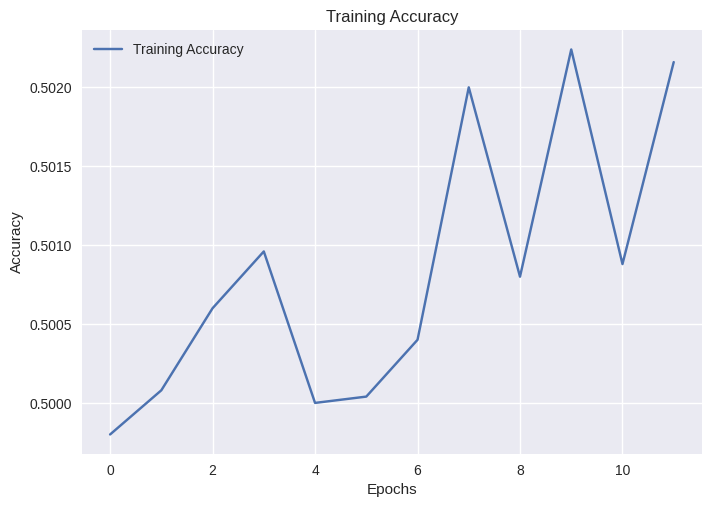

782/782 [==============================] - 3s 3ms/step


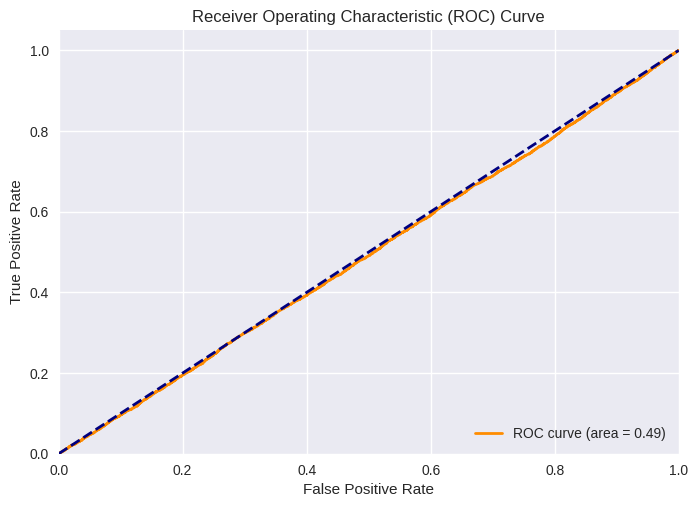

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 512, OPT_ALG = Momentum ====================


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_9 (LSTM)               (None, 128)               131584    
                                                                 
 dense_18 (Dense)            (None, 32)                4128      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
      

<ipython-input-8-5fbdafcfc95b>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


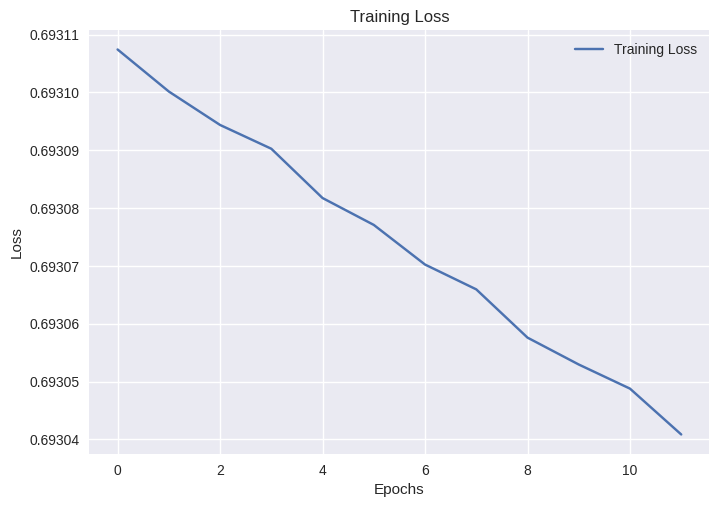

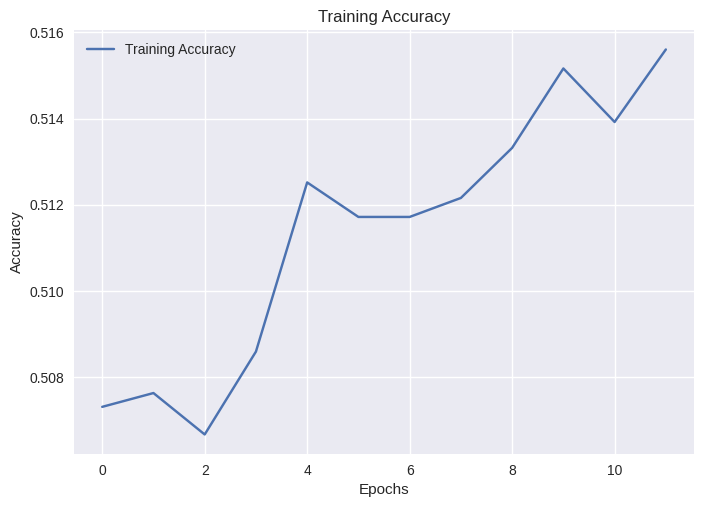

782/782 [==============================] - 3s 3ms/step


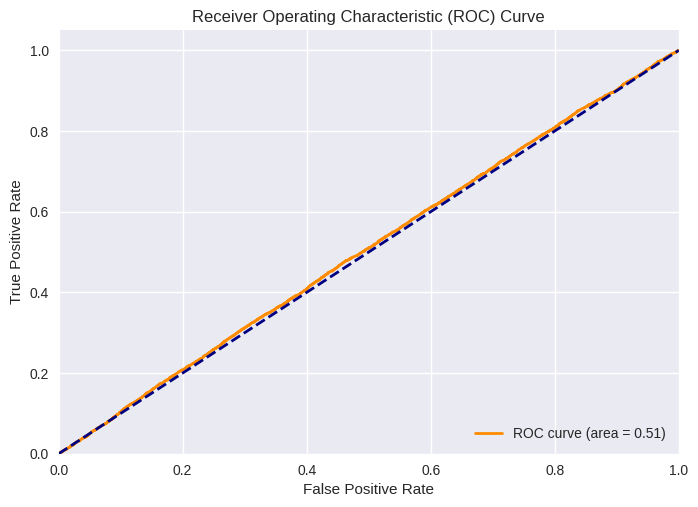

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 512, OPT_ALG = RMSprop ====================


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 128)         2560000   
                                                                 
 lstm_10 (LSTM)              (None, 128)               131584    
                                                                 
 dense_20 (Dense)            (None, 32)                4128      
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
      

<ipython-input-8-5fbdafcfc95b>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


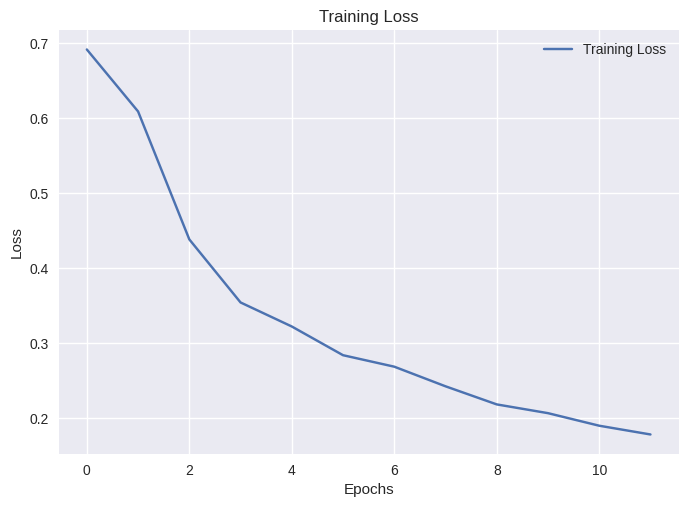

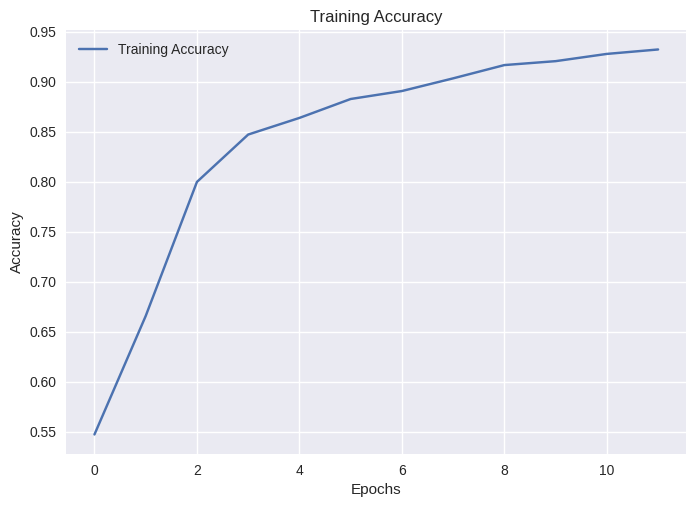

782/782 [==============================] - 3s 3ms/step


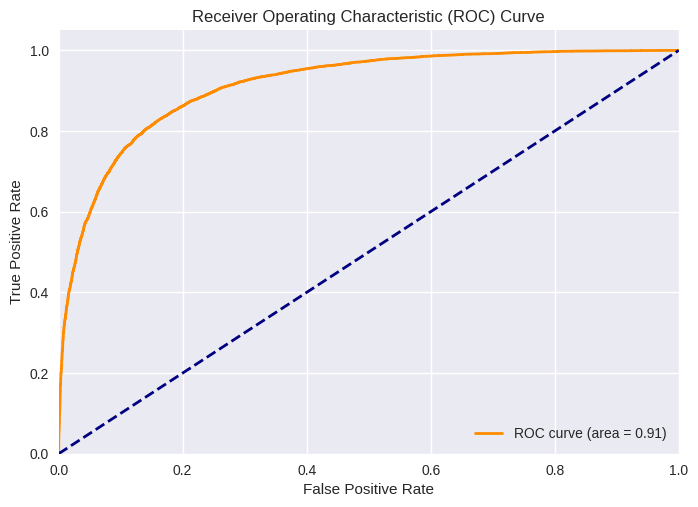

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 512, OPT_ALG = Adam ====================


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 128)         2560000   
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dense_22 (Dense)            (None, 32)                4128      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
         

<ipython-input-8-5fbdafcfc95b>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


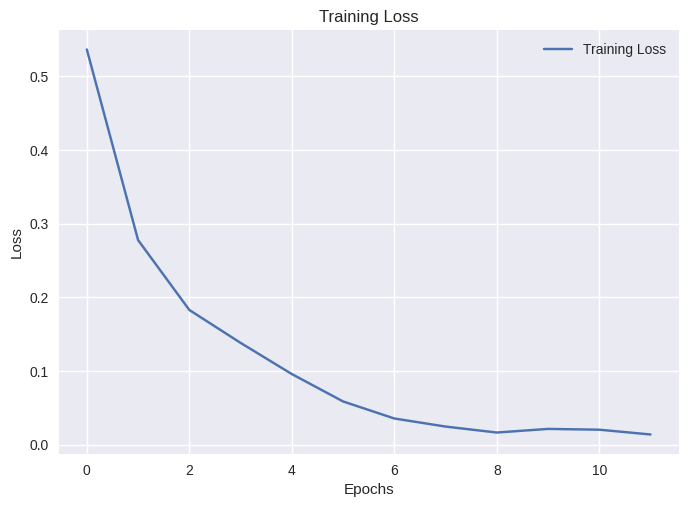

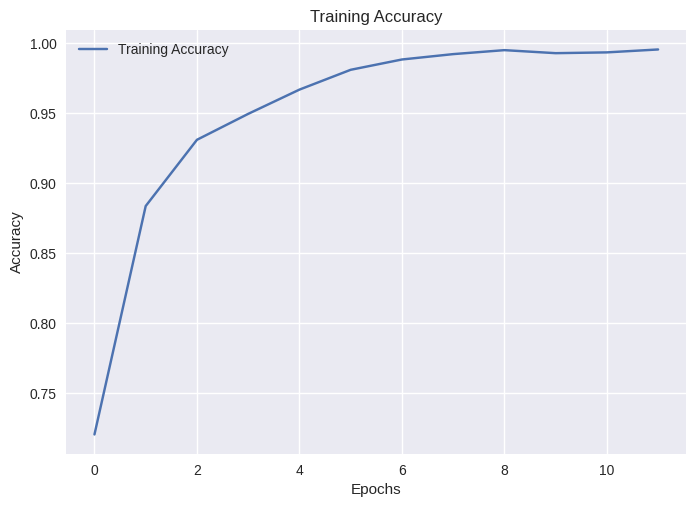

782/782 [==============================] - 3s 4ms/step


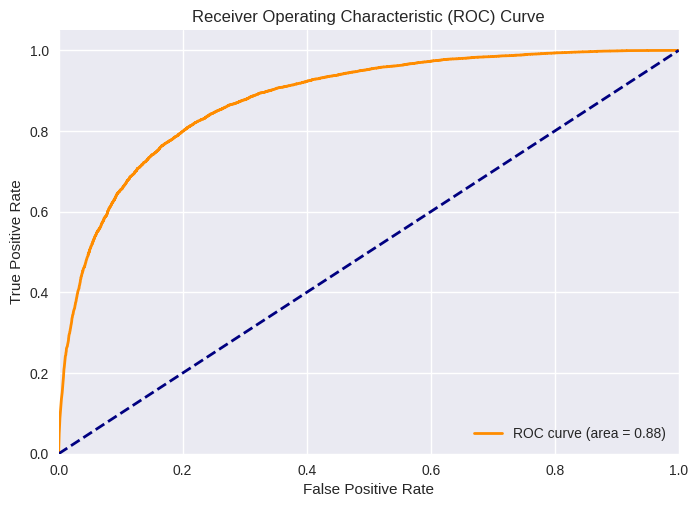

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 128, OPT_ALG = Plain ====================


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 128)         2560000   
                                                                 
 lstm_12 (LSTM)              (None, 128)               131584    
                                                                 
 dense_24 (Dense)            (None, 32)                4128      
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
        

<ipython-input-8-5fbdafcfc95b>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


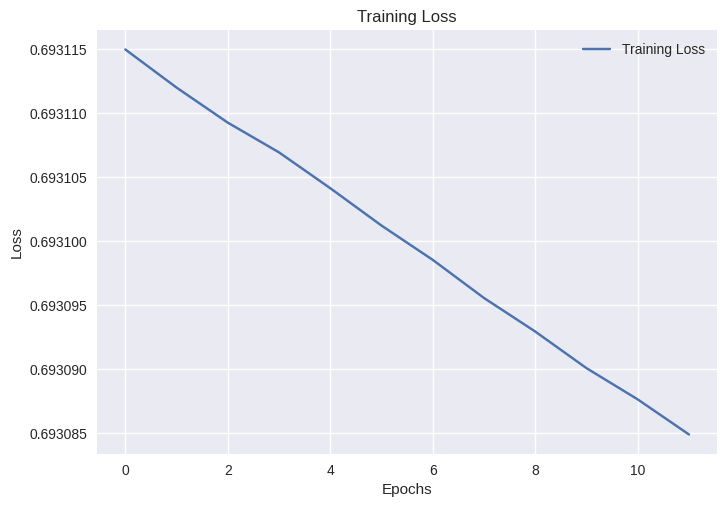

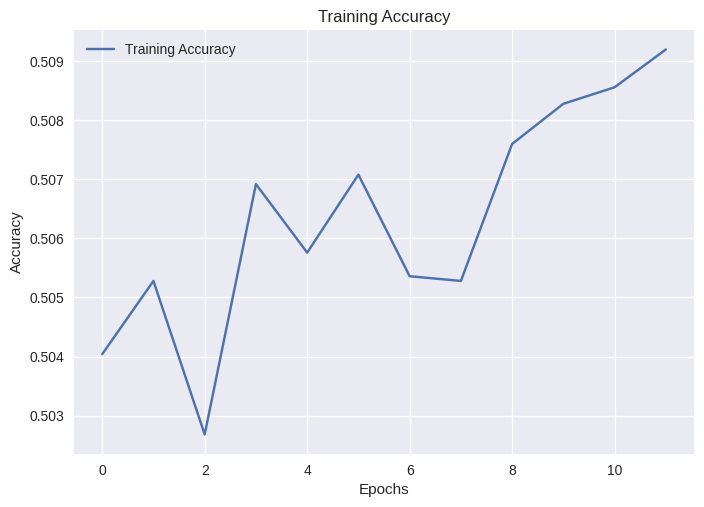

782/782 [==============================] - 3s 3ms/step


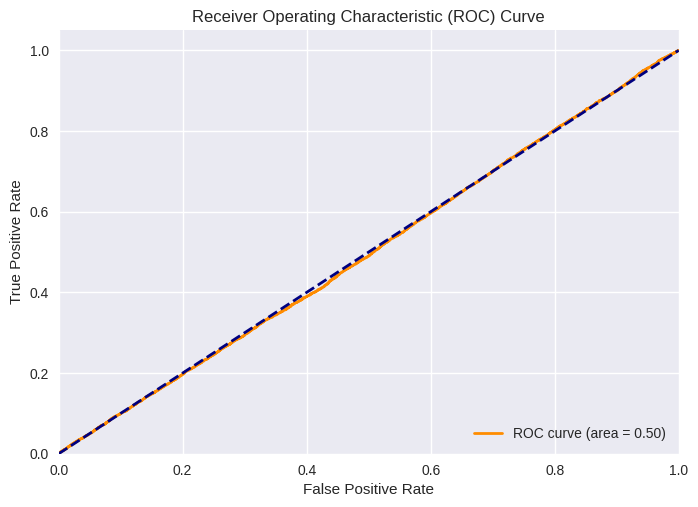

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 128, OPT_ALG = Momentum ====================


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 128)         2560000   
                                                                 
 lstm_13 (LSTM)              (None, 128)               131584    
                                                                 
 dense_26 (Dense)            (None, 32)                4128      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
     

<ipython-input-8-5fbdafcfc95b>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


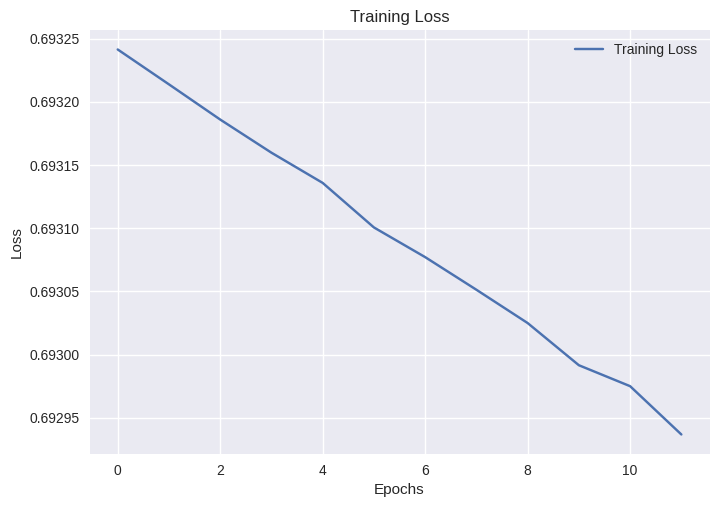

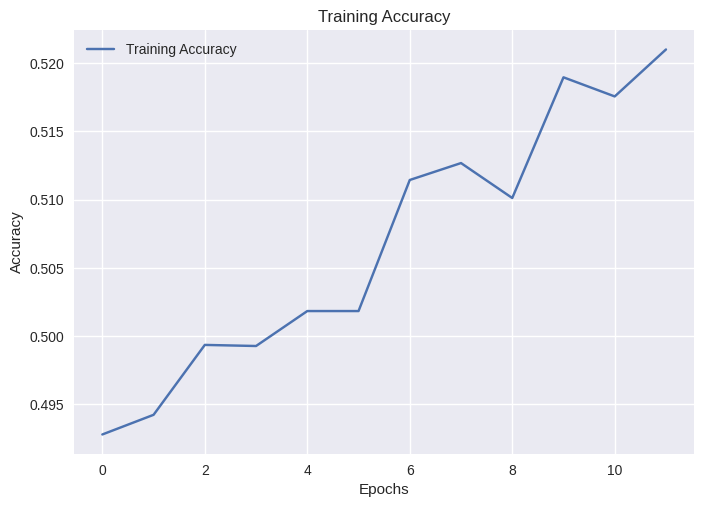

782/782 [==============================] - 3s 4ms/step


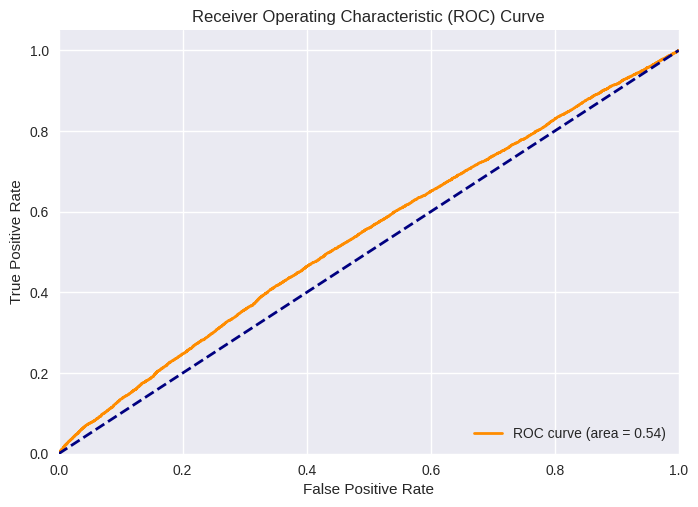

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 128, OPT_ALG = RMSprop ====================


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, None, 128)         2560000   
                                                                 
 lstm_14 (LSTM)              (None, 128)               131584    
                                                                 
 dense_28 (Dense)            (None, 32)                4128      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
      

<ipython-input-8-5fbdafcfc95b>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


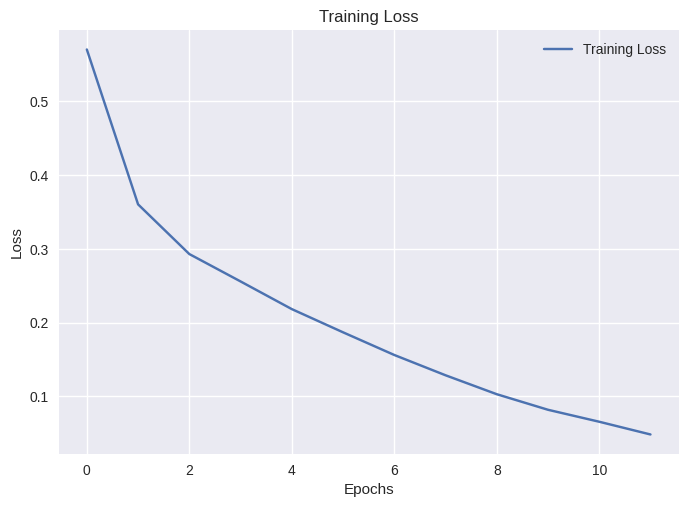

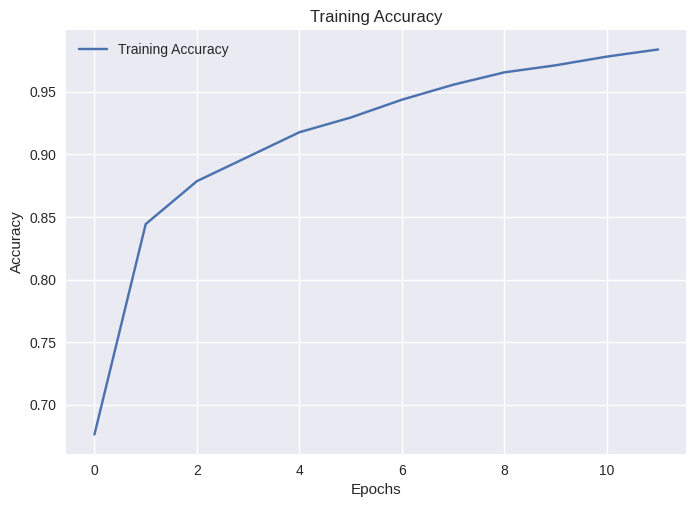

782/782 [==============================] - 3s 4ms/step


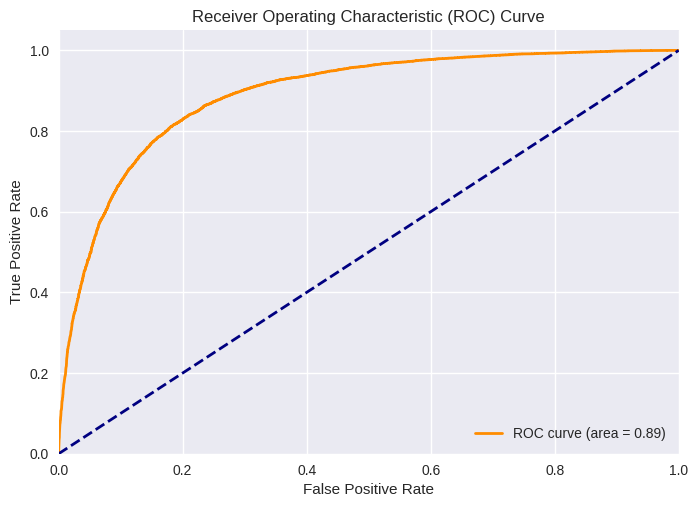

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 128, OPT_ALG = Adam ====================


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, None, 128)         2560000   
                                                                 
 lstm_15 (LSTM)              (None, 128)               131584    
                                                                 
 dense_30 (Dense)            (None, 32)                4128      
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
         

<ipython-input-8-5fbdafcfc95b>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


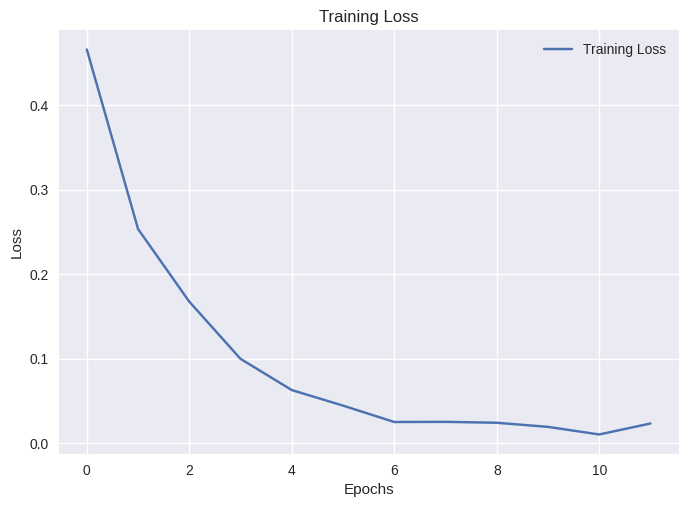

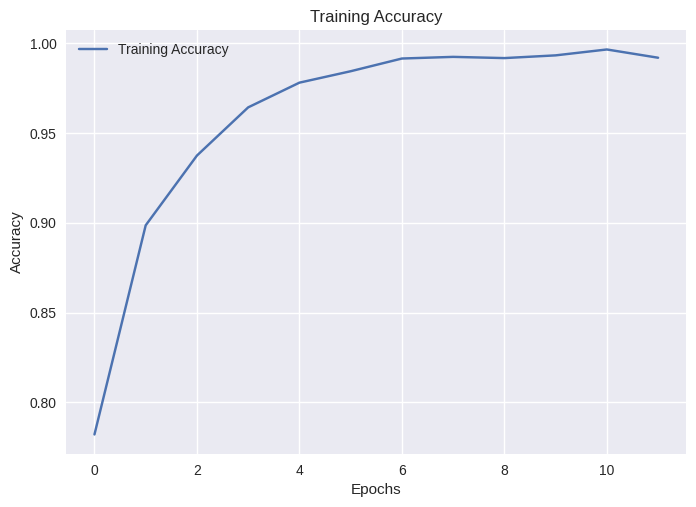

782/782 [==============================] - 3s 4ms/step


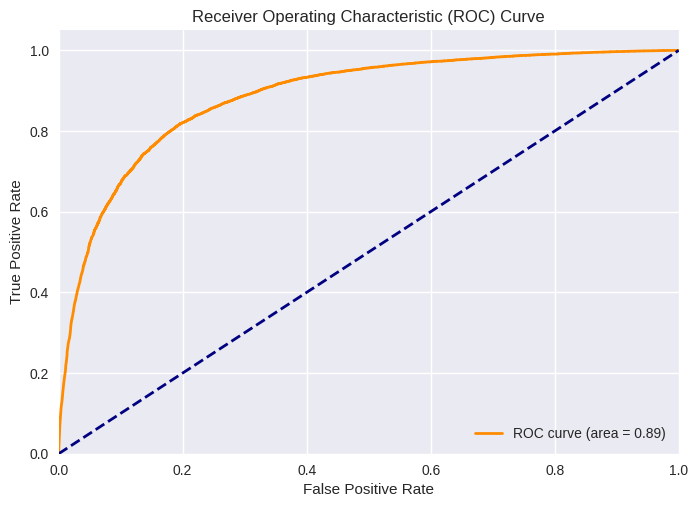

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================




In [ ]:
for size in batch_sizes:
  opt_algs = fetch_algs()
  for alg in opt_algs:
    print(f'==================== BATCH SIZE = {size}, OPT_ALG = {alg.name} ====================\n\n')
    model = model_sentiment()
    model.compile(loss="binary_crossentropy", optimizer=alg, metrics=['accuracy', precision,recall])
    model.summary()

    history = model.fit(x_train, y_train, batch_size=size, epochs=12)
    model.summary()
    # standard deviations of metrics
    loss_stdev = stdev(history.history['loss'])
    acc_stdev = stdev(history.history['accuracy'])
    pre_stdev = stdev(history.history[precision.name])
    rec_stdev = stdev(history.history[recall.name])

    print(f'\n\nLoss St.Dev: {loss_stdev} - ACC. St.Dev: {acc_stdev} - PREC. Std.Dev: {pre_stdev} - Rec. St.Dev: {rec_stdev}\n\n')

    plt.style.use('seaborn')
    # Plot training and validation loss
    plot_loss(history, filename=f"loss_{size}_{alg.name}.pgf")

    # Plot training and validation accuracy
    plot_accuracy(history, filename=f"acc_{size}_{alg.name}.pgf")

    # Get model predictions probabilities on validation set for ROC curve
    y_score = model.predict(x_test)

    # Plot ROC curve
    plot_roc(y_test, y_score, filename=f"roc_curve_{size}_{alg.name}.pgf")





    print(f'==================== ==================== ==================== ==================== ==================== ==================== ====================\n')
    print(f'==================== ==================== ==================== ==================== ==================== ==================== ====================\n\n')